# Road Safety Analysis

## Yonghui Rao, 16093645


# Introduction

## Background

Road traffic safety refers to the methods and measures used to prevent road users from being killed or seriously injured. Typical road users include pedestrians, cyclists, motorists, vehicle passengers, and passengers of on-road public transport (mainly buses and trams).

Road traffic crashes are one of the world’s largest public health and injury prevention problems. The problem is all the more acute because the victims are overwhelmingly healthy before their crashes. According to the World Health Organization (WHO), more than 1 million people are killed on the world’s roads each year.A report published by the WHO in 2004 estimated that some 1.2 million people were killed and 50 million injured in traffic collisions on the roads around the world each year and was the leading cause of death among children 10–19 years of age. The report also noted that the problem was most severe in developing countries and that simple prevention measures could halve the number of deaths.

## Purpose

This article aims to analyse the current situation of road safety all over the world, It also tries to find out the relationship between safety precautions and death rate. It may have refernce meaning for reducing death rate.
The data that used in this article was colloected by WHO during 2010 to 2014.

## Research Questions

1. Which countries have more vehicles in the world?
2. Which countries have the highest or the lowest death rate in road safety?
3. What is the realtion ship between speed limit and death rate?
4. Could belt wearing help reduce death rate of 4 wheeled vehicle passengers?
5. Could medical emergency training for doctors and nurses reduce death rate?

## Main Findings
The analysis shows that America, China and Japan are top 3 vehicle countries. In big vehicle countries, Brazil, Russia and China are in a bad situation of road safety while Japan, Italy and Genmany are relative road safe countries.
The speed limit does not hold a strong relation ship with death rate and belt wearing could save people's lives to a centain degree. Medical emergency training is another efficient means of reducing death rate.

# Data Analysis

## Vehicles Number

In [1]:
import sys
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(style="ticks")
from pylab import rcParams

#don't forget this line
%matplotlib inline
matplotlib.style.use('ggplot')

In [2]:
rcParams['figure.figsize'] = 15, 10
rcParams['font.size'] = 20
rcParams['axes.facecolor'] = 'white'

In [3]:
Vehicles_data = pd.io.parsers.read_csv(
    'Number of registered vehicles.csv',
     usecols=[0,3]
    )
Vehicles_data.columns=['Country','Vehicles_Number']
Vehicles_data['Vehicles_Number'].replace(regex=True,inplace=True,to_replace=r'\D',value=r'')
#
Vehicles_data['Vehicles_Number'] = pd.to_numeric(Vehicles_data['Vehicles_Number'], errors='coerce')
sum_number = Vehicles_data.Vehicles_Number.sum()
print 'Total vehicles number in the world is',sum_number


Total vehicles number in the world is 1776136357.0


### Explanations and Discussions
Read data from 'Number of registered vehicles.csv' which contains the vehicles number per countries. The data is collected in different time so it is an estimate value.
The data shows there are about 1776136357 vehicles in the world.


In [4]:
# Remove the countries that has vehicles less than 50000000
sample_vehicles_data=Vehicles_data[Vehicles_data.Vehicles_Number> 50000000]
sample_vehicles_data

,Country,Vehicles_Number
23,Brazil,81600729.0
34,China,250138212.0
60,Germany,52391000.0
70,India,159490578.0
71,Indonesia,104211132.0
76,Italy,51269218.0
78,Japan,91377312.0
132,Russian Federation,50616163.0
171,United States of America,265043362.0


### Explanations and Discussions
The countries that have more than 50 millions are Brazil, China, Germany, India, Indonesia, Italy, Japan, Russia and America.

In [5]:
# pie_Data is the DataFrame used to plot a pie chart which indicated the major vehicle countries  
pie_Data = sample_vehicles_data
pie_number = pie_Data.Vehicles_Number.sum()
others_number = sum_number - pie_number
# Combine all other countries
other_row = ['Other Countries', others_number]
pie_Data.loc[len(Vehicles_data)] = other_row

/home/yrao/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


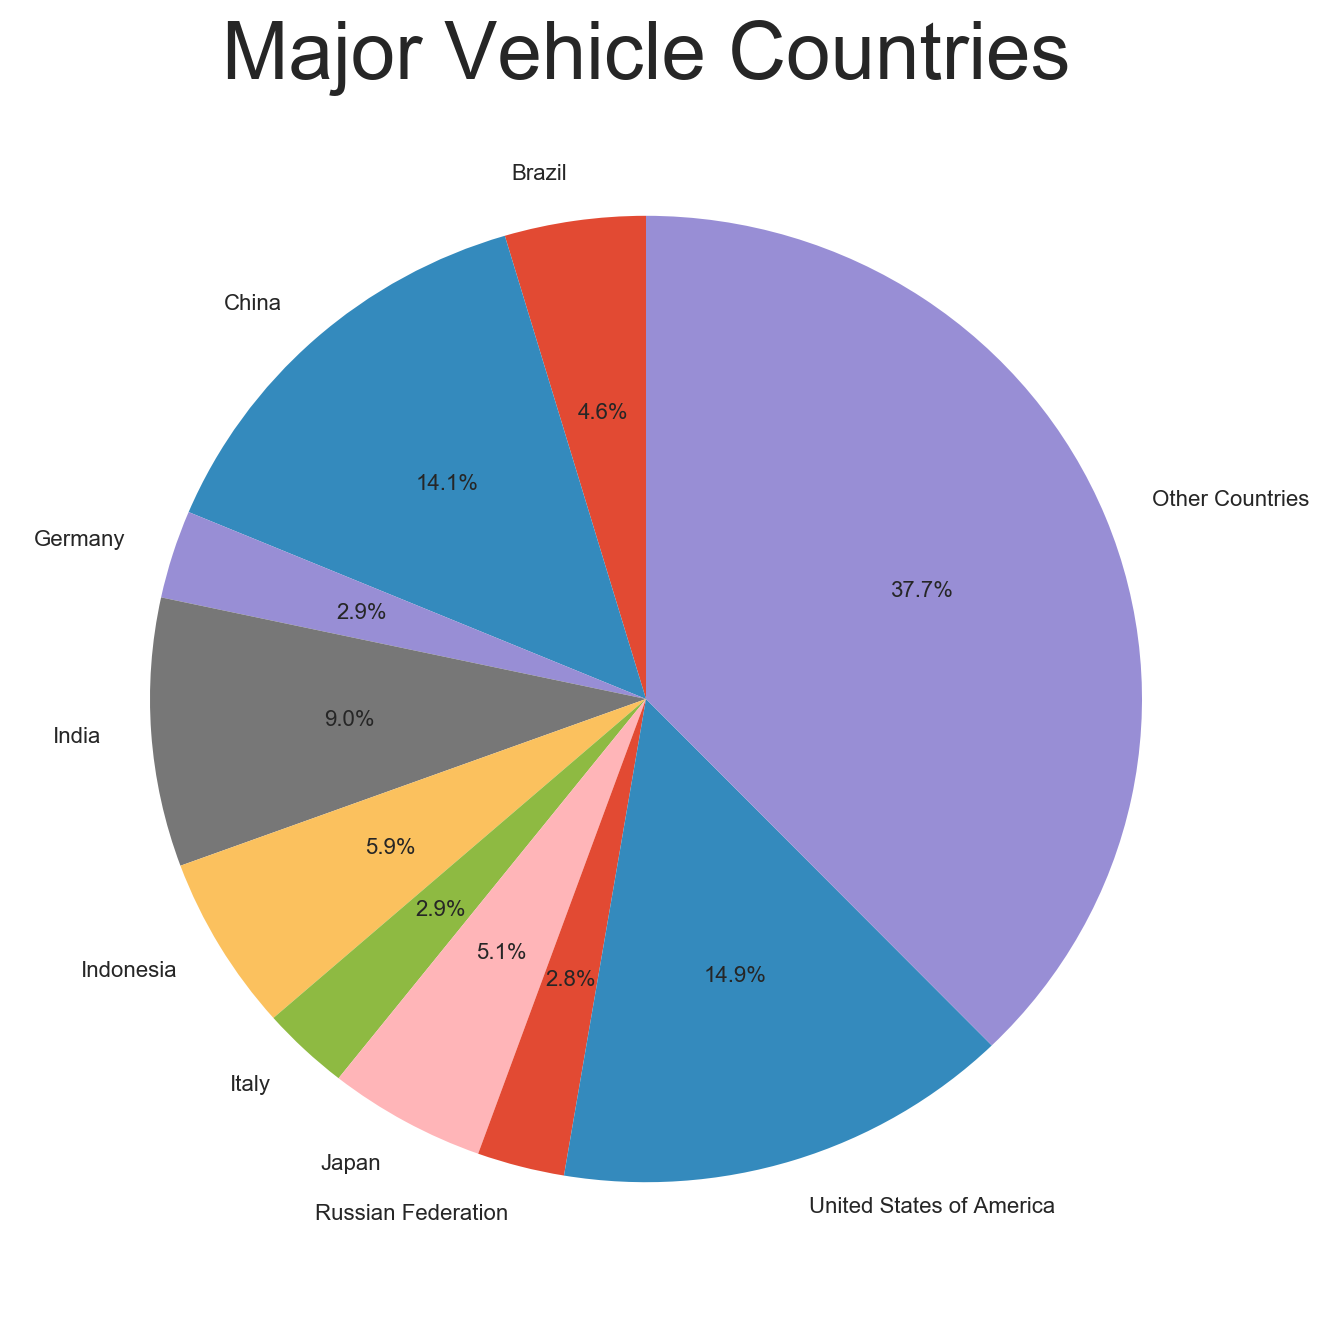

In [6]:
labels = pie_Data.Country
fig = plt.figure(figsize=(8,8), dpi=200)
ax= pie_Data.Vehicles_Number.plot(kind='pie', title='Major Vehicle Countries', labels=labels, autopct='%1.1f%%', startangle=90, fontsize=8)
ax.set_ylabel('')

### Explanations and Discussions
The pie chart displays the major vehicle countries and the propotions they own.
The chart shows that United States of America has the largest amount of vehicles, followed by India and China.
Indonesia, Japan Brazil also have a large amount of vehicles.

## Death Rate

In [7]:
death_rate_data = pd.io.parsers.read_csv(
    'death rate.csv',
     usecols=[0,2]
    )
death_rate_data.columns=['Country','death_rate']
death_rate_data=pd.merge(death_rate_data,Vehicles_data)
death_rate_data.head(10)

,Country,death_rate,Vehicles_Number
0,Afghanistan,15.5,655357.0
1,Albania,15.1,445956.0
2,Algeria,23.8,7308539.0
3,Andorra,7.6,76394.0
4,Angola,26.9,581530.0
5,Antigua and Barbuda,6.7,29989.0
6,Argentina,13.6,23120241.0
7,Armenia,18.3,NaN
8,Australia,5.4,17180596.0
9,Austria,5.4,6384971.0


In [8]:
print death_rate_data.ix[death_rate_data['death_rate'].idxmax()]
print death_rate_data.ix[death_rate_data[death_rate_data.death_rate>0]['death_rate'].idxmin()]


Country              Thailand
death_rate               36.2
Vehicles_Number    3.2477e+07
Name: 158, dtype: object
Country            Micronesia (Federated States of)
death_rate                                      1.9
Vehicles_Number                                8337
Name: 103, dtype: object


/home/yrao/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  """Entry point for launching an IPython kernel.


### Explanations and Discussions
"Death rate" means the average value of how many people die by traffic accident in every 100000 persons.
From the output of above code, Thailand is in the worst situation of road safety, its death rate is 36.2, while Micronesia is the safest country, its death rate is 1.9.


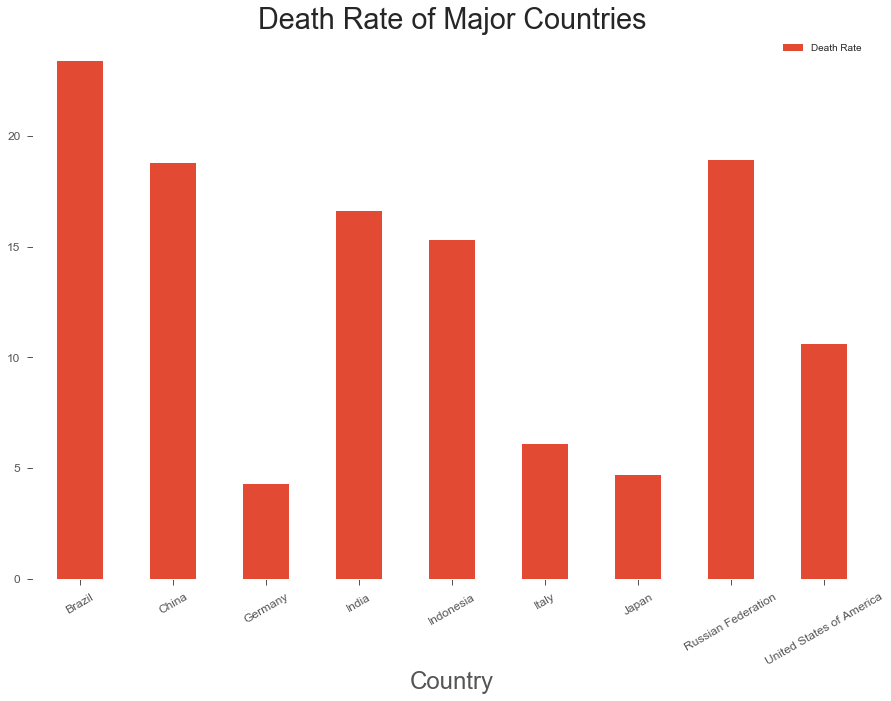

In [9]:
bar_death_rate_data = death_rate_data[death_rate_data.Vehicles_Number > 50000000]
y = bar_death_rate_data.death_rate
N = len(y)
x = bar_death_rate_data.Country
width = 1
ax=bar_death_rate_data[['Country','death_rate']].plot(kind='bar', title ="Death Rate of Major Countries", figsize=(15, 10), legend=True, fontsize=12, x=bar_death_rate_data['Country'], rot=30)
ax.legend(["Death Rate"]);

### Explanations and Discussions
This bar chart demostrates the death rates of major vehicle countries.
It is clear that Brazil, Russia and China are in bad situation of road safety while the death rates of Gemany and Japan are very low.

## Death Rate by Road Role

In [10]:
death_rate_role_data = pd.io.parsers.read_csv(
    'deaths by type of road user.csv',
     usecols=[0,2,3,4,5,6]
    )
death_rate_role_data.columns=['Country','vehicles_with_4wheel', 'vehicles_with_2or3wheel','Cyclists', 'Pedestrians','others']
death_rate_role_data=pd.merge(death_rate_role_data,Vehicles_data)
death_rate_role_data.head(10)

,Country,vehicles_with_4wheel,vehicles_with_2or3wheel,Cyclists,Pedestrians,others,Vehicles_Number
0,Albania,50.8,13.2,4.1,31.2,0.7,445956.0
1,Andorra,0.0,50.0,0.0,50.0,0.0,76394.0
2,Angola,0.0,1.9,0.0,35.4,62.7,581530.0
3,Antigua and Barbuda,66.7,0.0,16.7,16.7,0.0,29989.0
4,Argentina,88.0,0.0,2.0,10.1,0.0,23120241.0
5,Armenia,54.7,0.0,0.3,35.8,9.2,NaN
6,Australia,64.2,17.9,4.2,13.2,0.6,17180596.0
7,Austria,42.4,21.5,11.2,18.0,5.9,6384971.0
8,Azerbaijan,62.1,0.5,0.3,30.5,6.7,1135936.0
9,Bahamas,57.7,17.3,3.8,21.2,0.0,144388.0


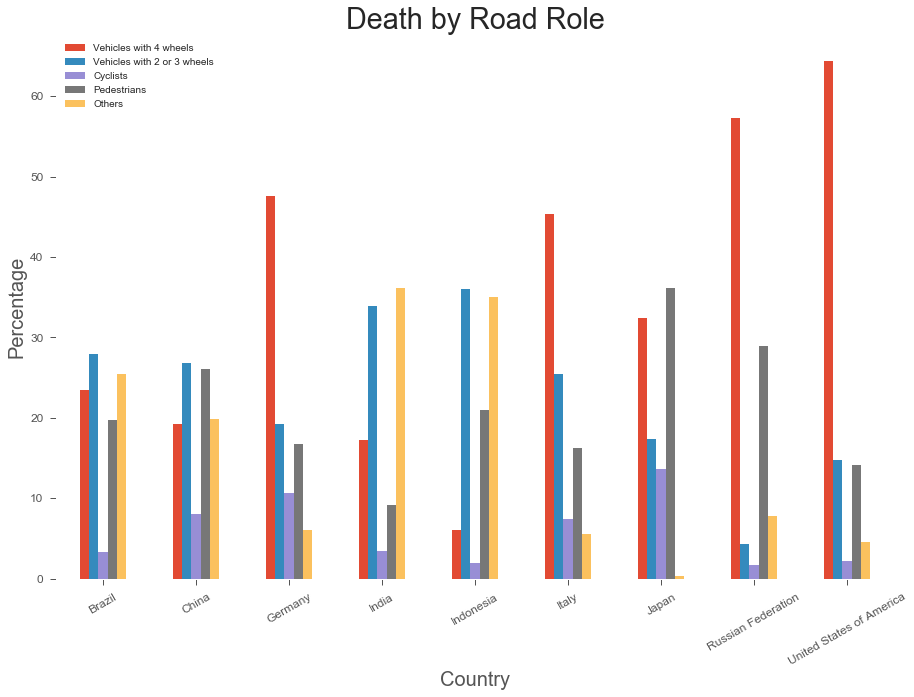

In [11]:
bar_death_rate_role_data=death_rate_role_data[death_rate_role_data.Vehicles_Number> 50000000]
ax = bar_death_rate_role_data[['vehicles_with_4wheel','vehicles_with_2or3wheel','Cyclists','Pedestrians','others']].plot(kind='bar', title ="Death by Road Role",x=bar_death_rate_role_data['Country'],rot=30, figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel('Country', fontsize=20)
ax.set_ylabel('Percentage', fontsize=20)
ax.legend(["Vehicles with 4 wheels", "Vehicles with 2 or 3 wheels", "Cyclists", "Pedestrians", "Others"]);
plt.show()


### Explanations and Discussions
This chart indicates the continuent parts of death in major countries, it could be seen that "Vehicles with 4 wheels" is the largest propotion in America, Russia, Italy and Gemany, that means most death people are passengers of 4 wheeled vehicle. The reason may be personal car is the first choice of transportation therefore most traffic accident are caused by vehicles.
On the other hand, most of death are passengers of 2 or 3 wheeled vehicle in Brazil, China and India. All of them are developing countries and motorcycle is very popular in these countries.
Death rate of cyclists is relatively low in every country, the reason may be that cyclist can not reach a high speed.
When it comes to pedestrians, Japan is not a perfect country in reducing pedestrians' death and but it is the safest transport method in India. 

## Speed Limit

In [12]:
#Extract a number from a string, the string could contain 1 or 2 numbers,if there are 2 numbers, return the average value.
#The string format should like '100-200' or '~100', this function will return 150 and 100 respectively
def extractNumber(x):
    #your code here:
    result=result1=result2=0
    substrs=x.split('-')
    if len(substrs) == 1 :
        result = filter(str.isdigit, substrs[0])
        if(len(result) > 0):
            result = int(result);
    elif len(substrs) == 2:
        str1 = filter(str.isdigit, substrs[0])
        if(len(str1) > 0):
            result1 = int(result1);
        str2 = filter(str.isdigit, substrs[1])
        if(len(str2) > 0):
            result2 = int(result2);
        result = (result1 + result2)/2
    return result

In [13]:
speed_Limit_data = pd.io.parsers.read_csv(
    'Maximum speed limits.csv',
     usecols=[0,2,3]
    )
speed_Limit_data.columns=['Country','Rural', 'Urban']

#The values of speed limit is in string format, convert them number
speed_Limit_data['Rural']=speed_Limit_data['Rural'].apply(lambda x: extractNumber(x))
speed_Limit_data['Urban']=speed_Limit_data['Urban'].apply(lambda x: extractNumber(x))
speed_Limit_data['Rural'] = pd.to_numeric(speed_Limit_data['Rural'], errors='coerce')
speed_Limit_data['Urban'] = pd.to_numeric(speed_Limit_data['Urban'], errors='coerce')
print 'The mean value of speed limit in urban area is', speed_Limit_data[speed_Limit_data.Urban>0]['Urban'].mean()
print 'The mean value of speed limit in rural area is', speed_Limit_data[speed_Limit_data.Rural>0]['Rural'].mean()

The mean value of speed limit in urban area is 55.6624203822
The mean value of speed limit in rural area is 88.4


### Explanations and Discussions
Different country has different rule of speed limit, the mean value of speed limit in urban area is 55.67 km/h, while in rural area, it is 88.4 km/h which is much higher.

In [14]:
scatter_speed_Limit_data = speed_Limit_data[speed_Limit_data.Rural>0][speed_Limit_data.Urban>0]
scatter_speed_Limit_data = pd.merge(scatter_speed_Limit_data, death_rate_data,how='inner')
#To avoid the interference of small sample countries, we only statistic the countries that has more than 100000 vehicles.  
scatter_speed_Limit_data = scatter_speed_Limit_data[scatter_speed_Limit_data.Vehicles_Number>100000]
scatter_speed_Limit_data.head(10)

/home/yrao/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Country,Rural,Urban,death_rate,Vehicles_Number
0,Albania,80.0,40.0,15.1,445956.0
1,Algeria,100.0,50.0,23.8,7308539.0
3,Angola,90.0,60.0,26.9,581530.0
5,Argentina,110.0,60.0,13.6,23120241.0
7,Austria,100.0,50.0,5.4,6384971.0
8,Azerbaijan,90.0,60.0,10.0,1135936.0
9,Bahrain,100.0,60.0,8.0,545155.0
10,Barbados,80.0,80.0,6.7,112118.0
11,Belarus,90.0,60.0,13.7,3900442.0
12,Belgium,90.0,50.0,6.7,6993767.0


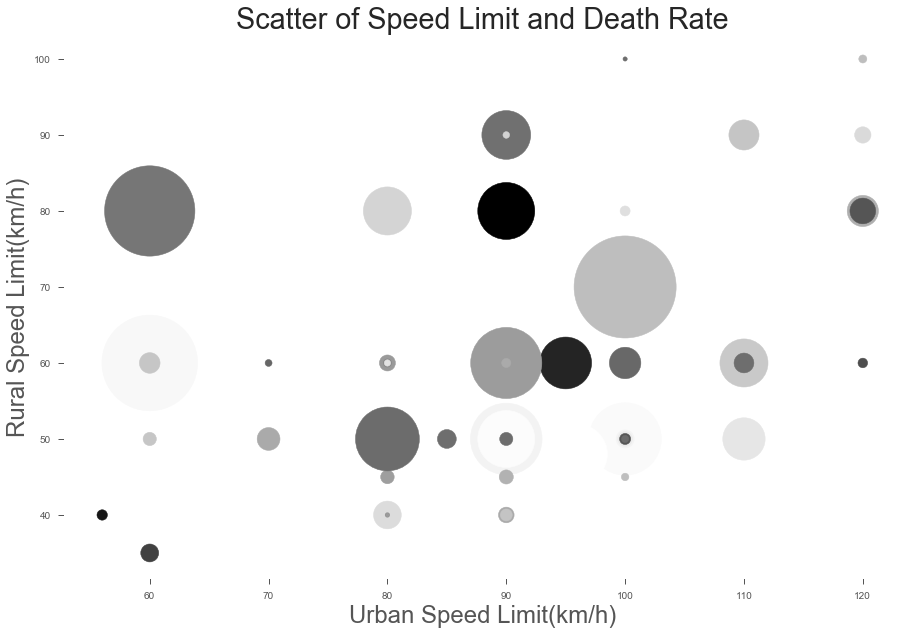

In [15]:
plt.title("Scatter of Speed Limit and Death Rate")
plt.scatter(scatter_speed_Limit_data.Rural, scatter_speed_Limit_data.Urban,c=scatter_speed_Limit_data['death_rate'], s=scatter_speed_Limit_data['Vehicles_Number']/10000, alpha=1)
plt.ylabel('Rural Speed Limit(km/h)')
plt.xlabel('Urban Speed Limit(km/h)')

### Explanations and Discussions
The scatter chart above aims to find out the relationship between speed limit and death rate.
Each pot represents one country, The area of the pot represents the vehicle number of that country and the grey scale means the death rate. 
It is expected that the death rate would increase along with the increate of speed limit, but the chart shows a different result.
It can be seen that the death rate has no strong relation ship with speed limit, a low speed limit does not mean a low death rate. Next, we will try to analyze the relationship between speed limit and death rate of diffent road roles.

In [16]:
scatter_speed_Limit_role_data = pd.merge(scatter_speed_Limit_data, death_rate_role_data,how='inner')
scatter_speed_Limit_role_data=pd.merge(scatter_speed_Limit_role_data, death_rate_data,how='inner')
scatter_speed_Limit_role_data=scatter_speed_Limit_role_data[scatter_speed_Limit_role_data.death_rate > 0]

scatter_speed_Limit_role_data['vehicles_with_4wheel'] = scatter_speed_Limit_role_data['vehicles_with_4wheel']*scatter_speed_Limit_role_data['death_rate']/100
scatter_speed_Limit_role_data['vehicles_with_2or3wheel'] = scatter_speed_Limit_role_data['vehicles_with_2or3wheel']*scatter_speed_Limit_role_data['death_rate']/100
scatter_speed_Limit_role_data['Cyclists'] = scatter_speed_Limit_role_data['Cyclists']*scatter_speed_Limit_role_data['death_rate']/100
scatter_speed_Limit_role_data['Pedestrians'] = scatter_speed_Limit_role_data['Pedestrians']*scatter_speed_Limit_role_data['death_rate']/100
scatter_speed_Limit_role_data['others'] = scatter_speed_Limit_role_data['others']*scatter_speed_Limit_role_data['death_rate']/100

scatter_speed_Limit_role_data.head(10)

,Country,Rural,Urban,death_rate,Vehicles_Number,vehicles_with_4wheel,vehicles_with_2or3wheel,Cyclists,Pedestrians,others
0,Albania,80.0,40.0,15.1,445956.0,7.6708,1.9932,0.6191,4.7112,0.1057
1,Angola,90.0,60.0,26.9,581530.0,0.0000,0.5111,0.0000,9.5226,16.8663
2,Argentina,110.0,60.0,13.6,23120241.0,11.9680,0.0000,0.2720,1.3736,0.0000
3,Austria,100.0,50.0,5.4,6384971.0,2.2896,1.1610,0.6048,0.9720,0.3186
4,Azerbaijan,90.0,60.0,10.0,1135936.0,6.2100,0.0500,0.0300,3.0500,0.6700
5,Bahrain,100.0,60.0,8.0,545155.0,4.7440,0.2800,0.4640,2.5120,0.0000
6,Barbados,80.0,80.0,6.7,112118.0,2.2311,1.1189,0.7437,2.6063,0.0000
7,Belarus,90.0,60.0,13.7,3900442.0,6.7404,0.0000,1.0823,5.6992,0.1644
8,Belgium,90.0,50.0,6.7,6993767.0,3.4773,1.0653,0.6767,0.9179,0.5628
9,Bolivia (Plurinational State of),80.0,40.0,23.2,1206743.0,13.0152,2.2968,0.2088,7.5400,0.1392


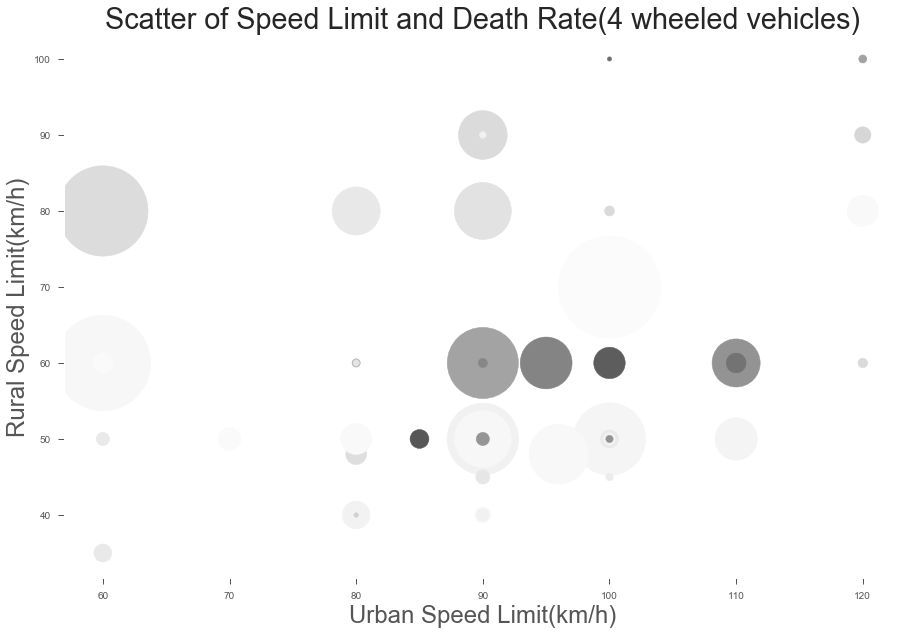

In [17]:
plt.title("Scatter of Speed Limit and Death Rate(4 wheeled vehicles)")
plt.scatter(scatter_speed_Limit_role_data.Rural, scatter_speed_Limit_role_data.Urban,c=scatter_speed_Limit_role_data['vehicles_with_4wheel'], s=scatter_speed_Limit_role_data['Vehicles_Number']/10000, alpha=1)
plt.ylabel('Rural Speed Limit(km/h)')
plt.xlabel('Urban Speed Limit(km/h)')

### Explanations and Discussions
This chart shows that the death rate of 4 wheeled vehicles is large when rural speed limit is 60 km/h and urban speed limit is between 85 km/h to 110 km/h. While in other areas, the death rate are much higher.
It could be an indicator for govenment to reduce this kind of death rate by designing a reasonable speed limit. 


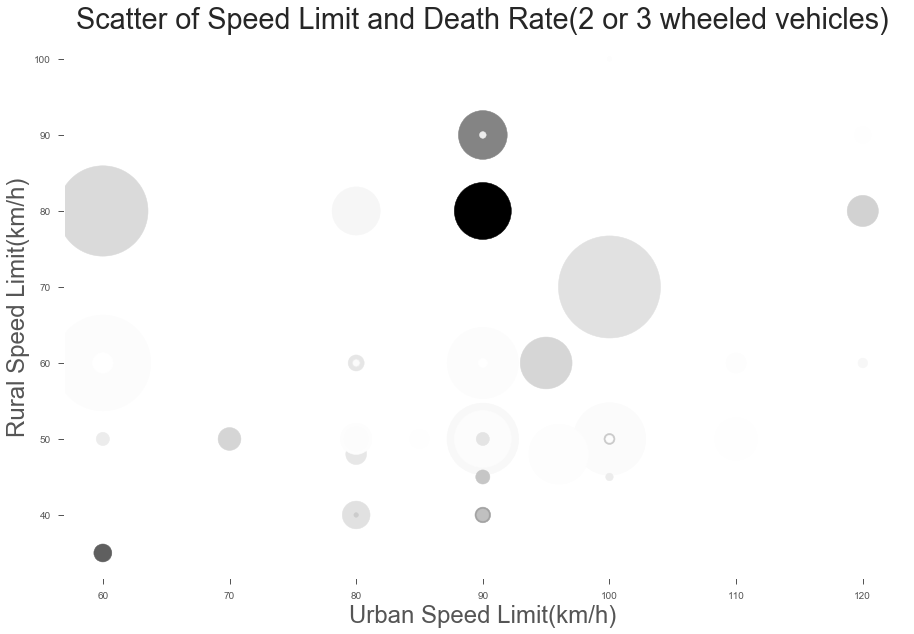

In [18]:
plt.title("Scatter of Speed Limit and Death Rate(2 or 3 wheeled vehicles)")
plt.scatter(scatter_speed_Limit_role_data.Rural, scatter_speed_Limit_role_data.Urban,c=scatter_speed_Limit_role_data['vehicles_with_2or3wheel'], s=scatter_speed_Limit_role_data['Vehicles_Number']/10000, alpha=1)
plt.ylabel('Rural Speed Limit(km/h)')
plt.xlabel('Urban Speed Limit(km/h)')

### Explanations and Discussions
This chart reveals that passengers of 2 or 3 wheeled vehicles are more dangerous when rural speed limit us neer 80 km/h and urban speed limit is neer 90 km/n.

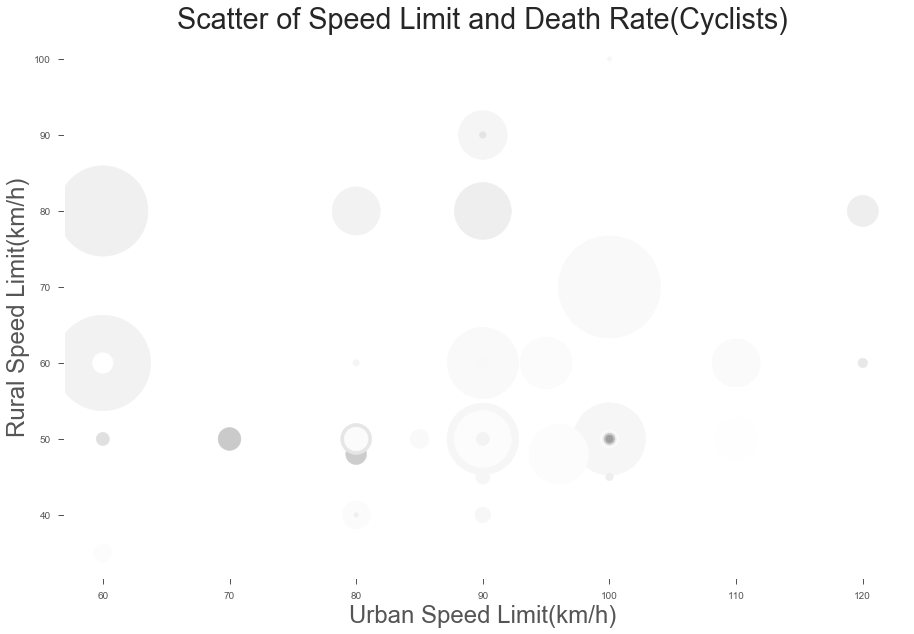

In [19]:
plt.title("Scatter of Speed Limit and Death Rate(Cyclists)")
plt.scatter(scatter_speed_Limit_role_data.Rural, scatter_speed_Limit_role_data.Urban,c=scatter_speed_Limit_role_data['Cyclists'], s=scatter_speed_Limit_role_data['Vehicles_Number']/10000)
plt.ylabel('Rural Speed Limit(km/h)')
plt.xlabel('Urban Speed Limit(km/h)')

### Explanations and Discussions
The death rate of cyclists is always low regardless of speed limit, however, a rural speed limit of 50 km/h seems worse for cyclists comparing with others.

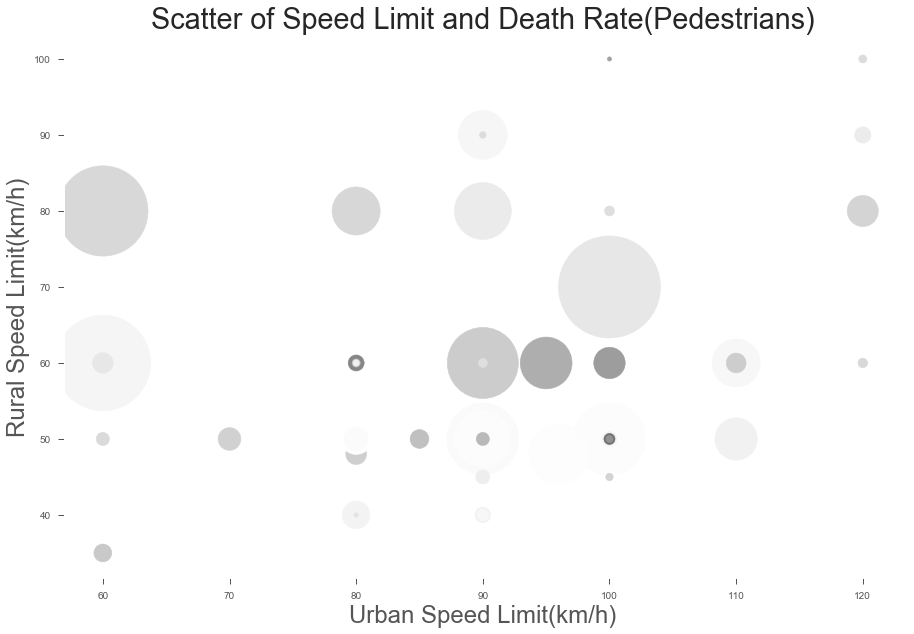

In [20]:
plt.title("Scatter of Speed Limit and Death Rate(Pedestrians)")
plt.scatter(scatter_speed_Limit_role_data.Rural, scatter_speed_Limit_role_data.Urban,c=scatter_speed_Limit_role_data['Pedestrians'], s=scatter_speed_Limit_role_data['Vehicles_Number']/10000)
plt.ylabel('Rural Speed Limit(km/h)')
plt.xlabel('Urban Speed Limit(km/h)')

### Explanations and Discussions
The death rate of pedestrians has less relationship to speed limit, unless that 60 km/h seems like a bad option for rural speed limit.

## Seat Belt Wearing Rate

In [21]:
belt_wear_data = pd.io.parsers.read_csv(
    'Seat-belt wearing rate.csv',
     usecols=[0,5]
    )
belt_wear_data.columns=['Country','belt_wear_rate']
belt_wear_data['belt_wear_rate'] = pd.to_numeric(belt_wear_data['belt_wear_rate'], errors='coerce')
belt_wear_data.head(10)

,Country,belt_wear_rate
0,Afghanistan,NaN
1,Albania,NaN
2,Algeria,NaN
3,Andorra,70.0
4,Angola,60.0
5,Antigua and Barbuda,NaN
6,Argentina,38.0
7,Armenia,NaN
8,Australia,NaN
9,Austria,86.0


In [22]:
belt_and_death_data=pd.merge(belt_wear_data, death_rate_role_data,how='inner')
belt_and_death_data=pd.merge(belt_and_death_data, death_rate_data,how='inner')

belt_and_death_data=belt_and_death_data[belt_and_death_data.belt_wear_rate > 0][belt_and_death_data.death_rate>0]
belt_and_death_data['vehicles_with_4wheel'] = belt_and_death_data['vehicles_with_4wheel']*belt_and_death_data['death_rate']/100
belt_and_death_data['vehicles_with_2or3wheel'] = belt_and_death_data['vehicles_with_2or3wheel']*belt_and_death_data['death_rate']/100
belt_and_death_data['Cyclists'] = belt_and_death_data['Cyclists']*belt_and_death_data['death_rate']/100
belt_and_death_data['Pedestrians'] = belt_and_death_data['Pedestrians']*belt_and_death_data['death_rate']/100
belt_and_death_data['others'] = belt_and_death_data['others']*belt_and_death_data['death_rate']/100

belt_and_death_data.head(10)

/home/yrao/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


,Country,belt_wear_rate,vehicles_with_4wheel,vehicles_with_2or3wheel,Cyclists,Pedestrians,others,Vehicles_Number,death_rate
1,Andorra,70.0,0.0000,3.8000,0.0000,3.8000,0.0000,76394.0,7.6
2,Angola,60.0,0.0000,0.5111,0.0000,9.5226,16.8663,581530.0,26.9
4,Argentina,38.0,11.9680,0.0000,0.2720,1.3736,0.0000,23120241.0,13.6
7,Austria,86.0,2.2896,1.1610,0.6048,0.9720,0.3186,6384971.0,5.4
15,Belize,81.6,11.3704,5.3436,4.3432,2.3424,1.0004,NaN,24.4
22,Bulgaria,80.0,5.2207,0.7221,0.4316,1.5023,0.4316,3502771.0,8.3
25,Canada,95.3,3.9960,0.5040,0.1500,0.9420,0.4020,22366270.0,6.0
31,Croatia,48.0,4.9956,1.5732,0.5796,1.7296,0.3220,1869370.0,9.2
32,Cuba,60.0,1.5900,0.9300,0.9525,2.8950,1.1250,628155.0,7.5
39,Ecuador,55.6,0.4422,1.3869,0.1005,6.0300,12.1203,1721206.0,20.1


### Explanations and Discussion
The belt wearing rate should have a strong relationship with death rate of 4 wheeled vehicle passengers. So the actual value of this role's death rate is calculated by the total death rate and the propotion of 4 wheeled vehicles.

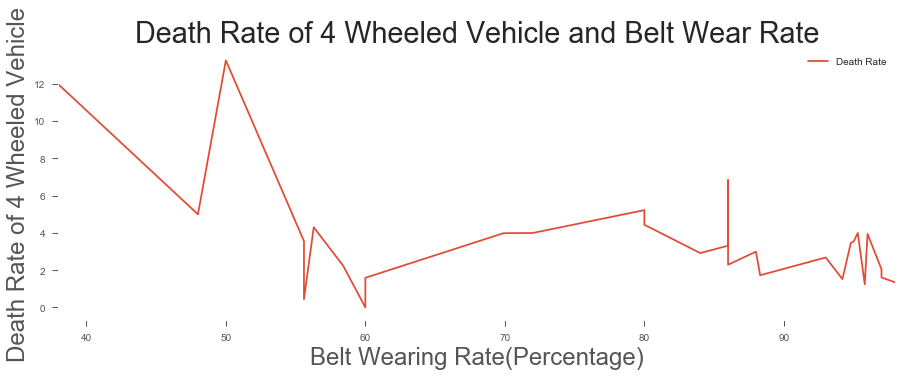

In [23]:
belt_and_death_data=belt_and_death_data[belt_and_death_data.Vehicles_Number>500000]
belt_and_death_data=belt_and_death_data.sort_values(by='belt_wear_rate')
belt_and_death_data
ax=belt_and_death_data.plot(x='belt_wear_rate', y='vehicles_with_4wheel', figsize=(15,5),title='Death Rate of 4 Wheeled Vehicle and Belt Wear Rate')
ax.set_xlabel('Belt Wearing Rate(Percentage)')
ax.set_ylabel('Death Rate of 4 Wheeled Vehicle')
ax.legend(["Death Rate"]);

### Explanations and Discussion
Though the curve in above figure is not smooth, it is still can be seem that increasing belt wearing rate could reduce the death rate of passengers of 4 wheeled vehicles.

## Training in Medical Emergency

In [24]:
medical_training_data = pd.io.parsers.read_csv(
    'Medical training.csv',
     usecols=[0,2,3]
    )
medical_training_data.columns=['Country','doctor traning available','nurse traning available']
medical_training_data.head(10)

,Country,doctor traning available,nurse traning available
0,Afghanistan,Yes,No
1,Albania,No,Yes
2,Algeria,No,No
3,Andorra,No,Yes
4,Angola,Yes,Yes
5,Antigua and Barbuda,Yes,Yes
6,Argentina,Yes,Yes
7,Armenia,Yes,Yes
8,Australia,Yes,Yes
9,Austria,Yes,No


### Explanations and Discussion
This data contains the information about whether medical emergency training is avalible for doctor or nurse per country.

In [25]:
box_medical_training_data=pd.merge(medical_training_data, death_rate_data,how='inner')
box_medical_training_data=box_medical_training_data[box_medical_training_data.Vehicles_Number>500000]


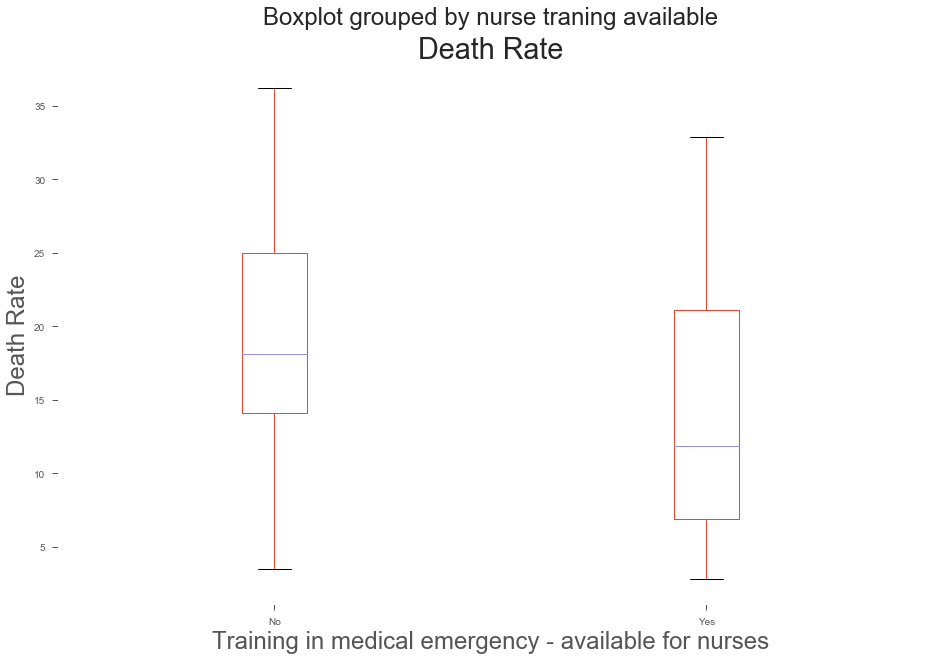

In [26]:
# There are some invalid item in the data set, only 'YES' and 'No' are valid string for the column 'Nurses_Traning'
box_medical_training_data = box_medical_training_data[box_medical_training_data['nurse traning available'].isin(['Yes','No'])]
ax=box_medical_training_data[['nurse traning available','death_rate']].boxplot(by='nurse traning available')


ax.set_title('Death Rate')
ax.set_xlabel('Training in medical emergency - available for nurses')
ax.set_ylabel('Death Rate')

### Explanations and Discussion
The box figure shows that for countries that medical emergency training is not available for nurses, the death rate by traffic accident is relitively high, and the median value is about 18.
While for countries that medical emergency training is available for nurses, the death rate is relatively low, the median value is about 12.
The results show that training in medical emergency for nurse is helpful in reducing death rate.

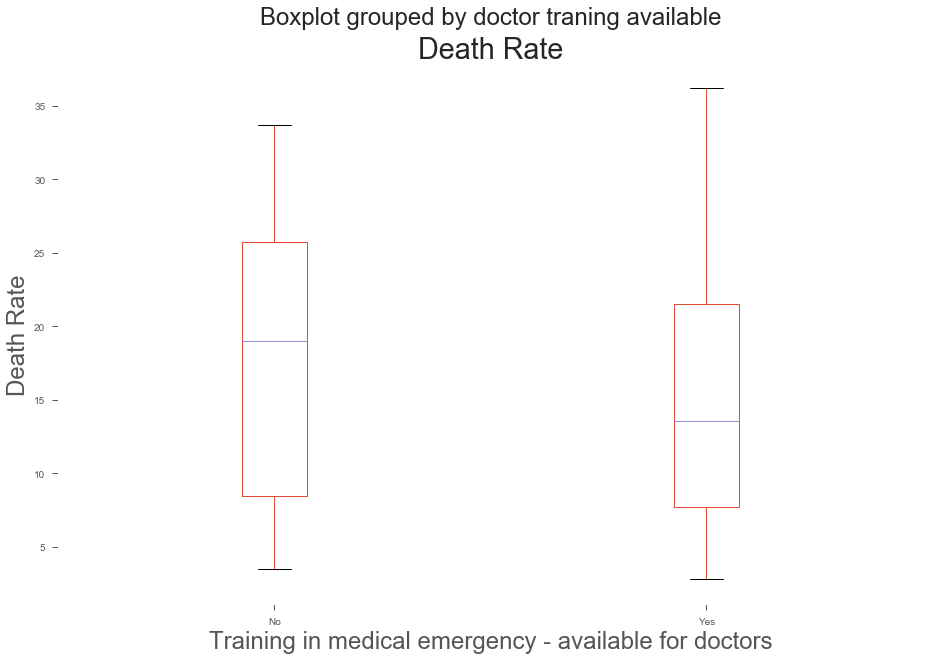

In [27]:
ax = box_medical_training_data[['doctor traning available','death_rate']].boxplot(by='doctor traning available')
ax.set_title('Death Rate')
ax.set_xlabel('Training in medical emergency - available for doctors')
ax.set_ylabel('Death Rate')

### Explanations and Discussion
The box figure shows that for countries that medical emergency training is not available for doctors, the death rate by traffic accident is relitively high, and the median value is about 19.
While for countries that medical emergency training is available for nurses, the death rate is relatively low, the median value is about 13.
The results show that training in medical emergency for doctor is helpful in reducing death rate.

In summary, medical emergency training is an efficient means of reducing death rate.

# Conclusion

This article analyses the current situation of road safety all over the world. According to the data analysis, Brazil, Russia and China are in bad situation of road safety. Japan, Italy and America have a low death rate. The constituent parts of death rate differs a lot per different countries. Low speed limit does not mean a low death rate, the rural and urban speed limit may have different affect on different road roles. Increasing belt wearing rate could reduce the death rate of 4 wheeled vehicle passengers to a great extent. Beside improve seat belt wearing rate, medical emergency training is also an efficient means of reducing death rate.
